# NAME - TULIKA DAS
# REG NO - 23MSD7046

# AIM : Hand Gesture Recognition Using CNN Architecture Trained On ASL (American Sign Language Dataset)

# 1) Importing Necessary libraries

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings("ignore")

# 2) Dataset Collection and Preprocessing
# The dataset has 2515 images with 36 classses (0-9 to a-z) where each class has 70 images except class t having 65 images. The dataset is splitted in 80:20 ratio with 2012 images for training and 503 images for validation after augmentation with a target size of 64 X 64. For testing, all 2515 images were used without augmentation.

In [4]:
# Define paths
dataset_path = "D:/Tulika/VIT AP 23-25/projects/DL Project/archive (17)/asl_dataset"

# Create ImageDataGenerator for training and validation
datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Randomly zoom into images
    validation_split=0.2  # Split data into training and validation sets (20% for validation)
)

# Load training data
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),  # Resize images to 64x64
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    subset='training'  # Set as training data
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',  # Use categorical labels
    subset='validation'  # Set as validation data
)
# Now, create a test generator (without augmentation) 
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test data 
test_generator = test_datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for test data to not shuffle
)

Found 2012 images belonging to 36 classes.
Found 503 images belonging to 36 classes.
Found 2515 images belonging to 36 classes.


# 3) Visualising 10 images of 10 different classes

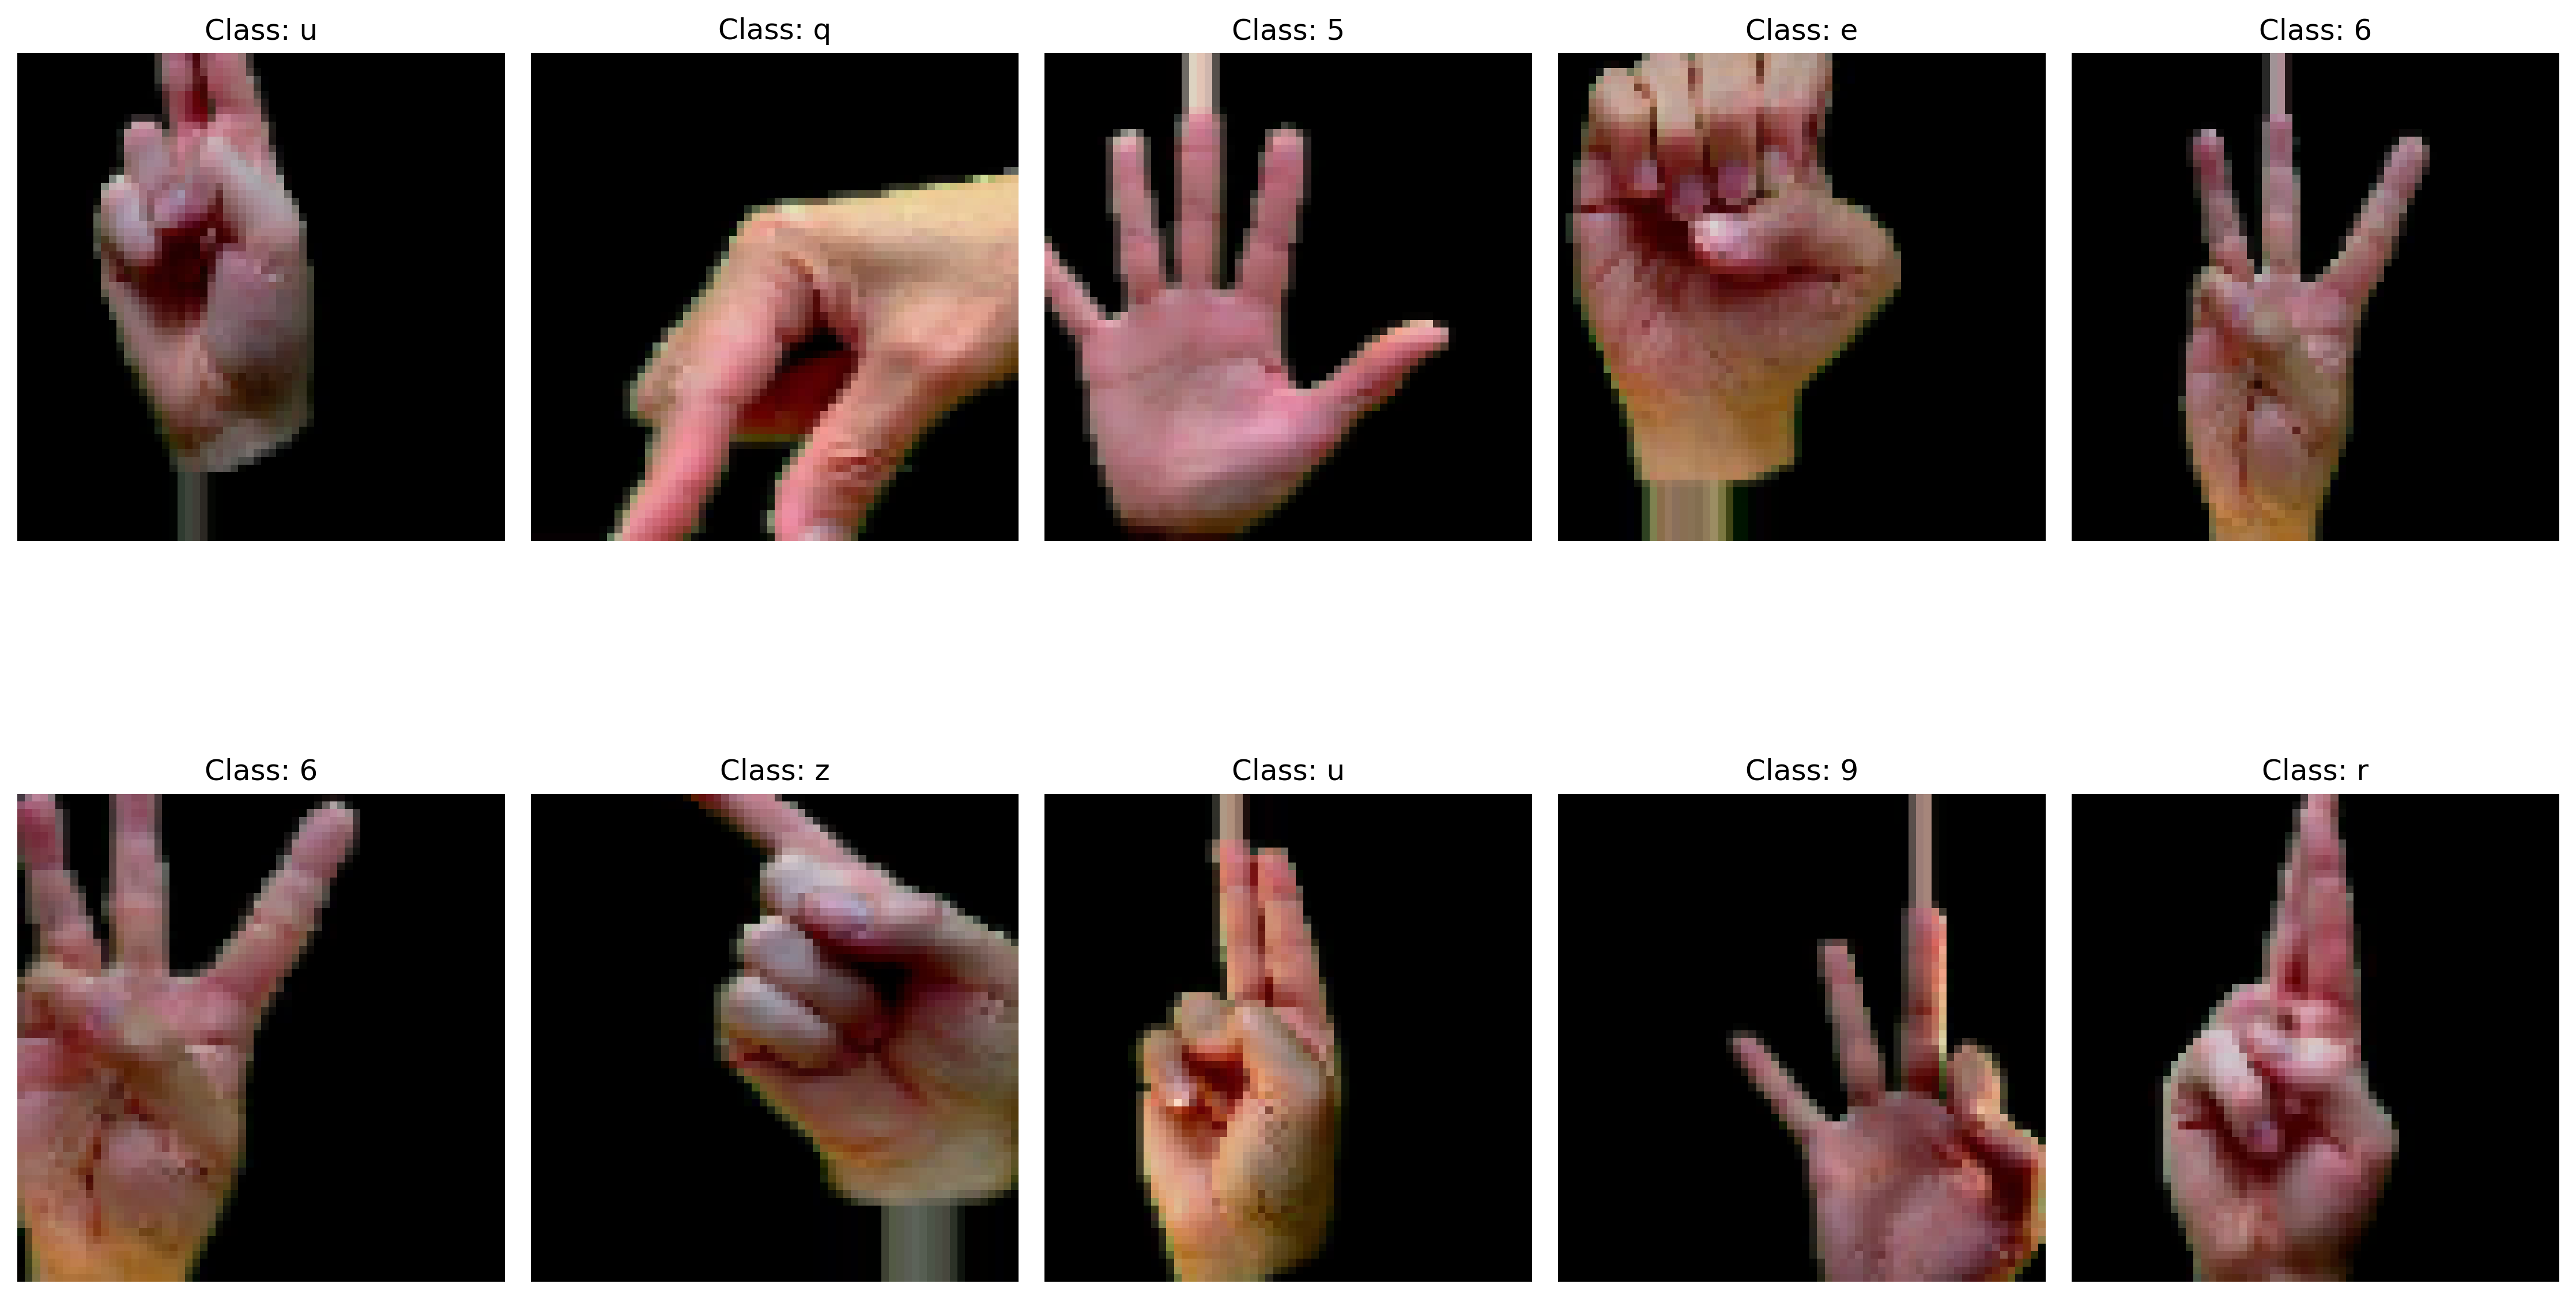

In [3]:
import matplotlib.pyplot as plt

# Set higher DPI for better image clarity
plt.rcParams['figure.dpi'] = 300  # Increase the DPI for better resolution
plt.rcParams['savefig.dpi'] = 300  # Ensure saved figures also have high DPI

# Get a batch of images and labels from the train_generator
images, labels = next(train_generator)

# Get class names from the generator
class_names = list(train_generator.class_indices.keys())

# Create a figure to display the images
plt.figure(figsize=(15,10))

# Loop through the first 10 images
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    plt.imshow(images[i])  # Display the image
    plt.title(f'Class: {class_names[labels[i].argmax()]}')  # Display the class name
    plt.axis('off')  # Hide the axes

# Show the plot
plt.tight_layout()
plt.show()

# 4) Building the Custom CNN model with 4 convolution layers and 2 fully Connected layers

In [17]:
from tensorflow.keras import layers, models, regularizers

# Build a custom CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.5), 
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Dense(36, activation='softmax')  # 36 classes (0-9 and a-z)
])

# 5) Compiling the model

In [18]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 36)                  │          18,468 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,708 (3.56 MB)

 Trainable params: 932,196 (3.56 MB)

 Non-trainable params: 512 (2.00 KB)

# 6) Training the model

In [19]:
# Train the model
from keras.callbacks import EarlyStopping
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True  # Restore model weights from the epoch with the best value
)

In [20]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
 callbacks=[early_stopping])

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 423ms/step - accuracy: 0.0827 - loss: 8.7717 - val_accuracy: 0.1412 - val_loss: 5.8027
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 394ms/step - accuracy: 0.3182 - loss: 4.2598 - val_accuracy: 0.3400 - val_loss: 4.5582
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 397ms/step - accuracy: 0.4801 - loss: 2.9968 - val_accuracy: 0.5050 - val_loss: 3.6074
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 403ms/step - accuracy: 0.5512 - loss: 2.4110 - val_accuracy: 0.6441 - val_loss: 2.9664
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.6475 - loss: 1.8889 - val_accuracy: 0.6541 - val_loss: 2.4480
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 404ms/step - accuracy: 0.6781 - loss: 1.6284 - val_accuracy: 0.6183 - val_loss: 2.0510
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.7031 - loss: 1.4788 - val_accuracy: 0.7555 - val_loss: 1.4327
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 400ms/step - accuracy: 0.7457 - loss: 1.2819 - val_accu

# 7) Plotting the graph for training and validation loss and accuracy respectively

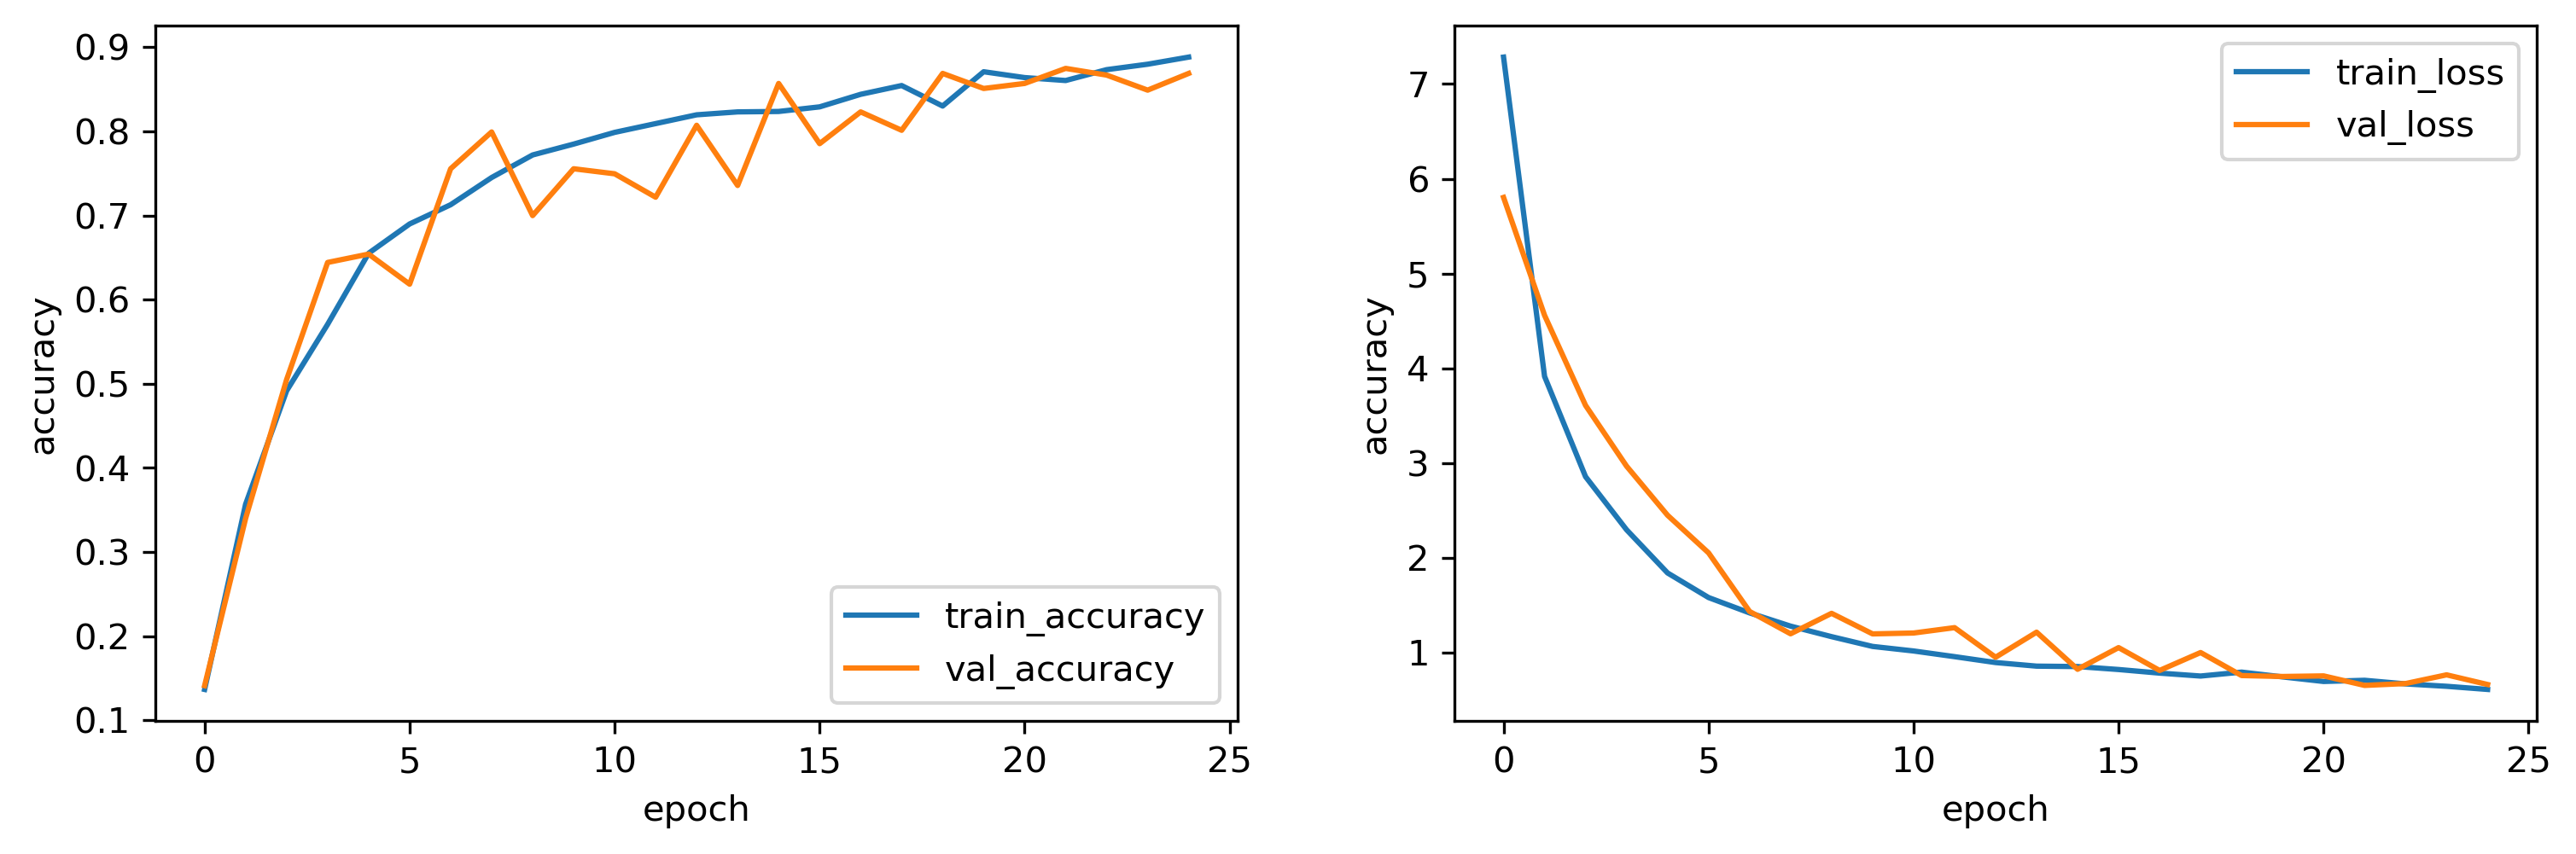

In [44]:
import matplotlib.pyplot as plt
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

plot_results(model)

# 8) Evaluating the performance of the model on test data

In [21]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.9096 - loss: 0.5936
Test Loss: 0.5093
Test Accuracy: 0.9400


# 9) Visualising Evaluation Metrics

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        70
           1       1.00      0.66      0.79        70
           2       0.69      1.00      0.82        70
           3       1.00      1.00      1.00        70
           4       0.88      1.00      0.93        70
           5       1.00      0.86      0.92        70
           6       0.92      0.50      0.65        70
           7       1.00      1.00      1.00        70
           8       1.00      0.99      0.99        70
           9       0.99      1.00      0.99        70
           a       0.96      0.97      0.96        70
           b       1.00      1.00      1.00        70
           c       1.00      1.00      1.00        70
           d       1.00      1.00      1.00        70
           e       1.00      1.00      1.00        70
           f       1.00      0.99      0.99        70
           g    

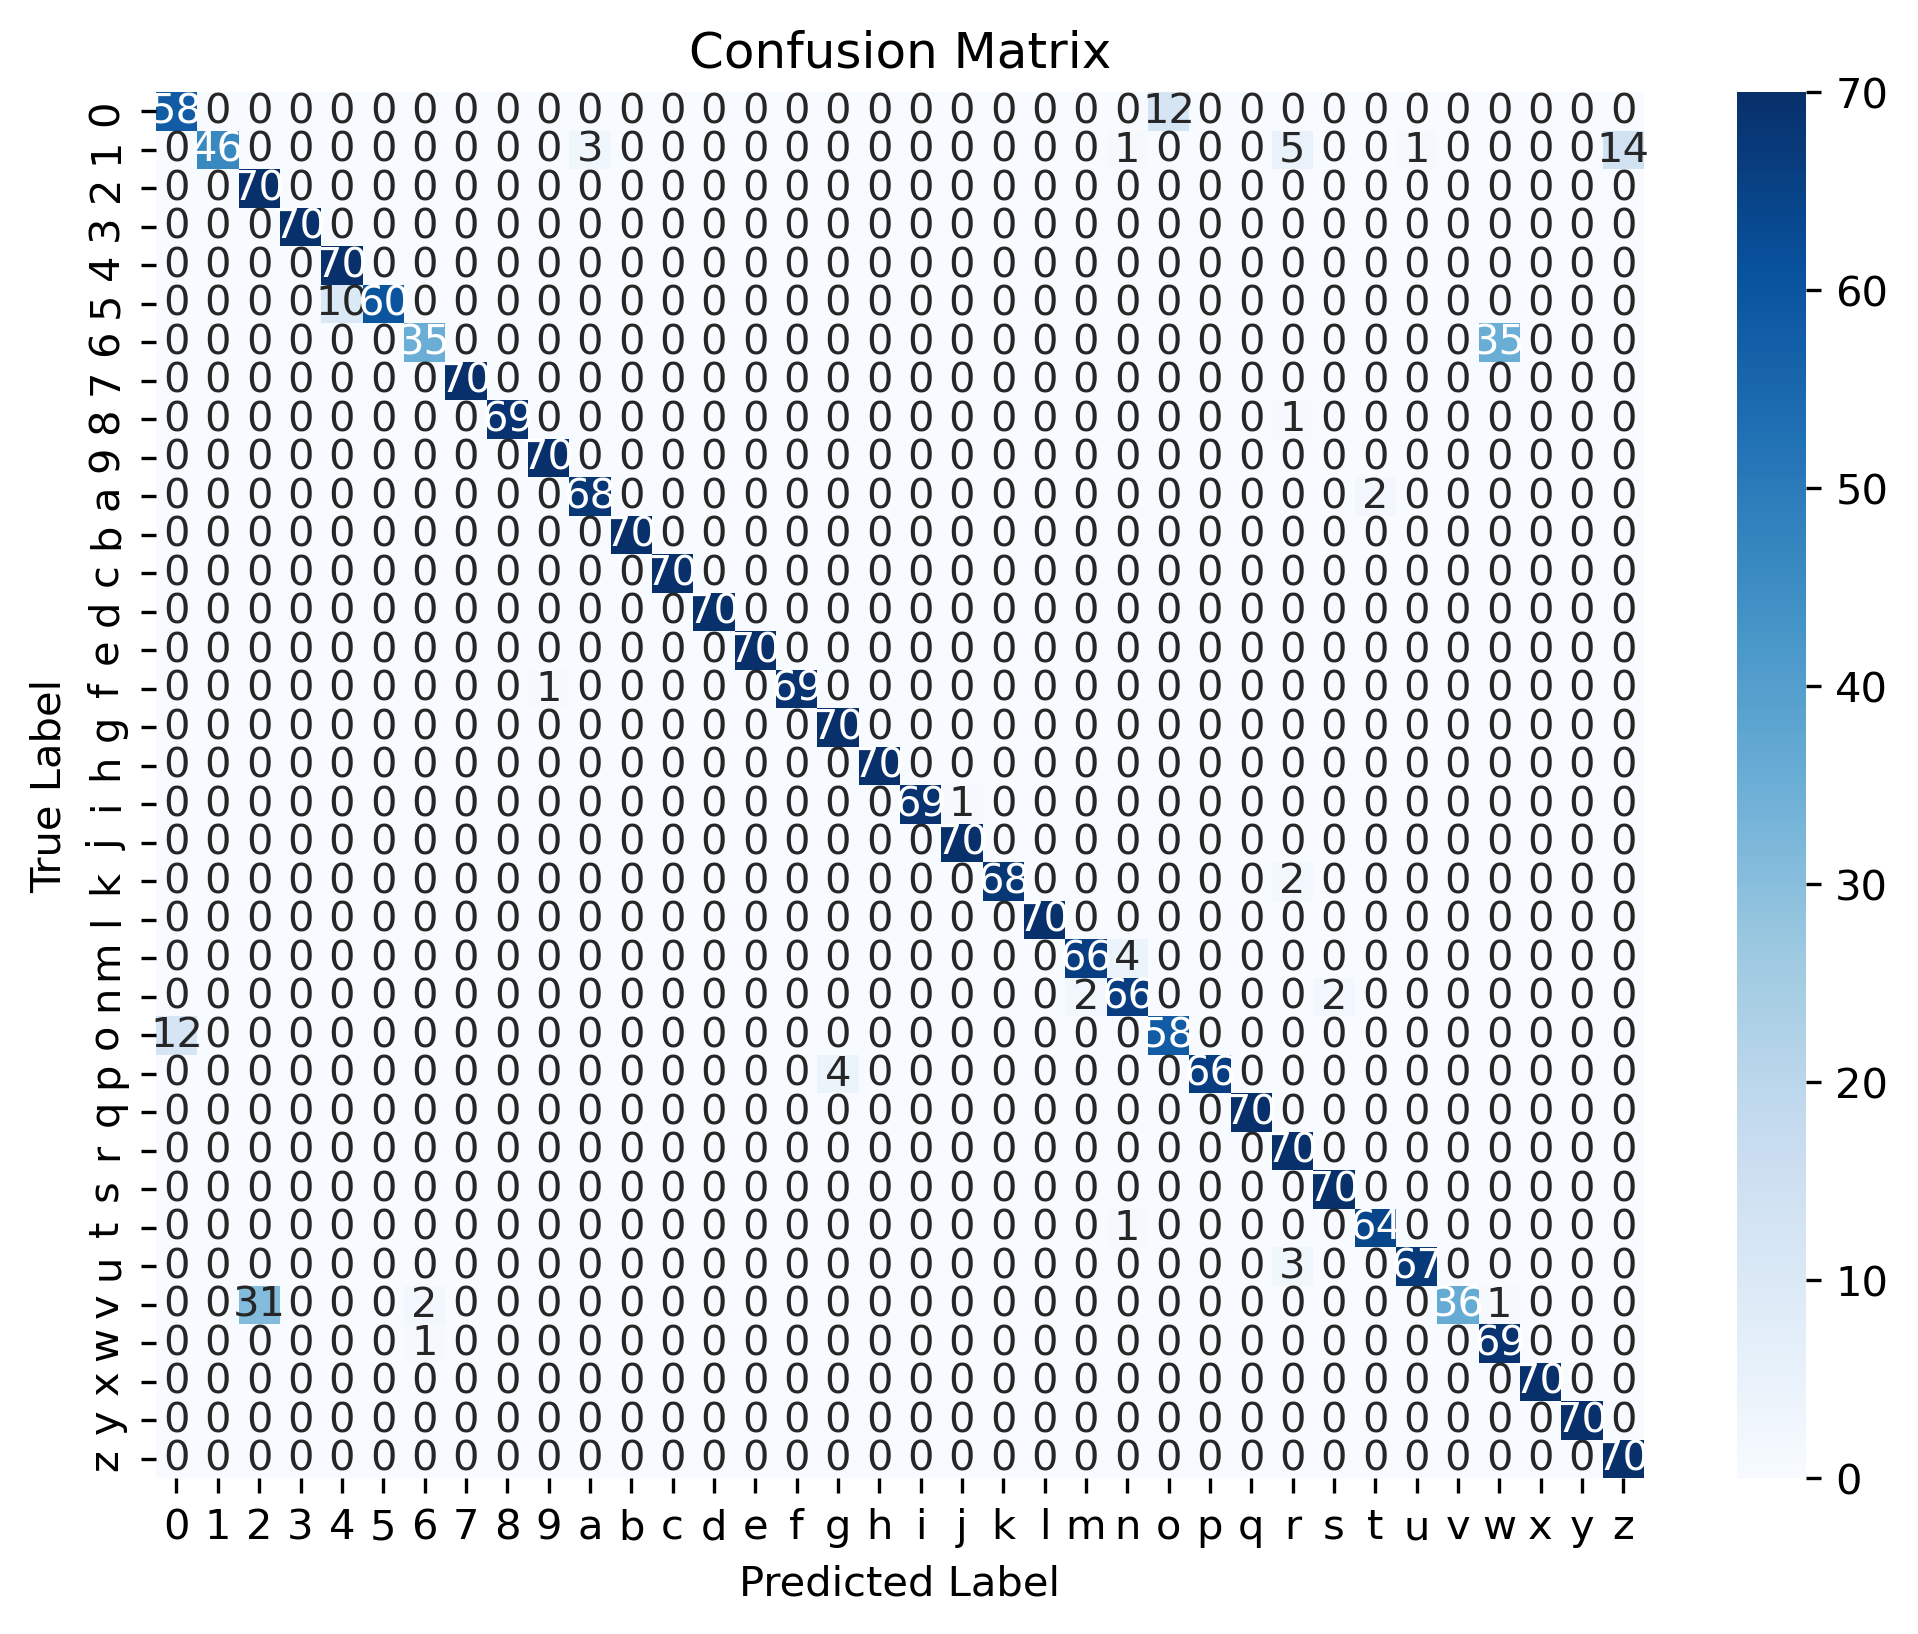

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Step 1: Get the true labels and predictions
y_true = test_generator.classes  # True class labels
y_pred_probs = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Step 2: Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Step 3: Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# 10) Display images, actual labels, and predicted labels for 10 randomly selected classes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━

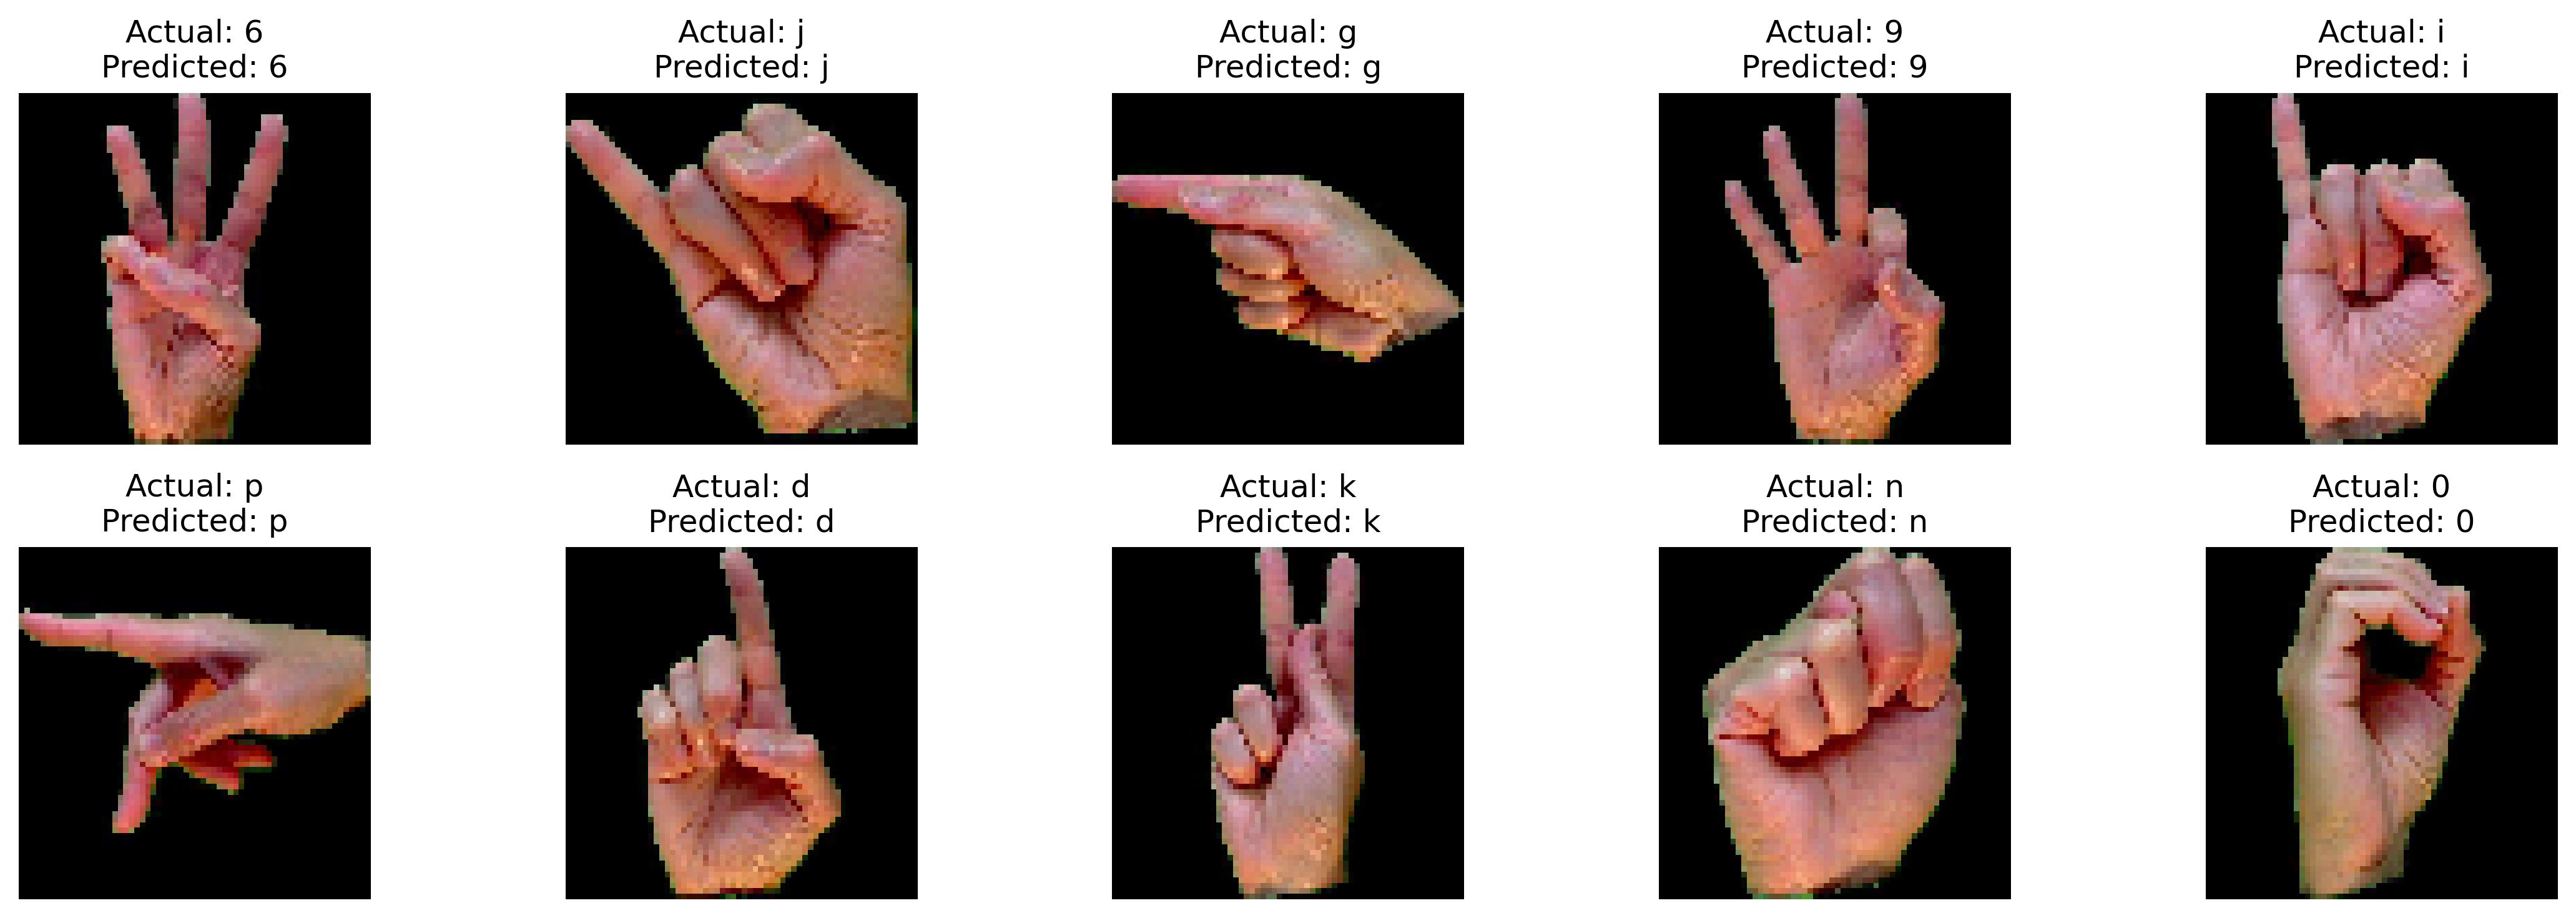

In [28]:
import random

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Create a dictionary to hold one image per class
class_images = {class_label: None for class_label in class_labels}

# Loop through the generator to collect images for each class
for images, labels in test_generator:
    # If labels are one-hot encoded, convert them to class indices
    if labels.ndim > 1:  # Check if labels are one-hot encoded
        labels = np.argmax(labels, axis=1)

    for i in range(len(labels)):
        actual_class = class_labels[labels[i]]  # Use labels[i] directly
        if class_images[actual_class] is None:  # If we haven't added an image for this class yet
            class_images[actual_class] = (images[i], labels[i], None)  # Placeholder for predicted_classes[i]

    # Break the loop if we have collected images for all classes
    if all(class_images[class_label] is not None for class_label in class_labels):
        break

# Make predictions on the collected images
for class_label in class_labels:
    if class_images[class_label] is not None:
        img, actual_label, _ = class_images[class_label]
        img = np.expand_dims(img, axis=0)  # Expand dimensions to match model input
        predictions = model.predict(img)
        predicted_class = np.argmax(predictions, axis=1)[0]
        class_images[class_label] = (img[0], actual_label, predicted_class)  # Update with predicted class

# Randomly select 10 unique classes
selected_classes = random.sample(class_labels, 10)

# Prepare images, actual labels, and predicted labels for the selected classes
selected_images = []
selected_actual_labels = []
selected_predicted_labels = []

for class_label in selected_classes:
    if class_images[class_label] is not None:
        img, actual_label, predicted_label = class_images[class_label]
        selected_images.append(img)
        selected_actual_labels.append(actual_label)
        selected_predicted_labels.append(predicted_label)

# Check if we have images to display
if len(selected_images) > 0:
    # Plot the images with actual and predicted labels
    def plot_images(images, actual_labels, predicted_labels, class_labels):
        plt.figure(figsize=(15, 5))
        for i in range(len(images)):
            plt.subplot(2, 5, i + 1)
            plt.imshow(images[i])
            plt.title(f"Actual: {class_labels[actual_labels[i]]}\nPredicted: {class_labels[predicted_labels[i]]}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    # Call the function to plot images
    plot_images(selected_images, selected_actual_labels, selected_predicted_labels, class_labels)
else:
    print("No images found for the selected classes.")

# 11) Saving the model in hierarchical structure format

In [ ]:
# Save the model
model.save('gesture_CNN_model.h5')

In [48]:
# Load the model
loaded_model = tf.keras.models.load_model('gesture_CNN_model.h5')

# 12) Real time Gesture Recognition Using Web Cam

In [91]:
import cv2
import numpy as np

# Define class labels from '0' to '9' and 'a' to 'z'
class_labels = [str(i) for i in range(10)] + [chr(i) for i in range(ord('a'), ord('z') + 1)]

# Initialize webcam
cap = cv2.VideoCapture(0)

# Define the ROI box dimensions and position it on the right side of the frame
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
roi_size = 300  # Adjusted size to fit the hand

# Position the ROI box on the right-hand side of the frame
roi_x, roi_y = frame_width - roi_size - 10, int(frame_height / 2 - roi_size / 2)  # Right side with some padding

# Function to pre-process the ROI for prediction
def pre_process_frame(frame):
    resized = cv2.resize(frame, (64, 64))  # Resize to model's input shape
    normalized_frame = resized / 255.0  # Normalize pixel values
    return normalized_frame

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale for better hand detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)

    # Use a threshold to create a binary image
    _, thresholded_frame = cv2.threshold(blurred_frame, 30, 255, cv2.THRESH_BINARY)

    # Find contours to detect hands
    contours, _ = cv2.findContours(thresholded_frame, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours are detected
    if contours:
        # Draw the ROI rectangle on the right side of the frame
        cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_size, roi_y + roi_size), (255, 0, 0), 2)

        # Extract the ROI
        roi = frame[roi_y:roi_y + roi_size, roi_x:roi_x + roi_size]

        # Pre-process the ROI for the model
        preprocessed_frame = pre_process_frame(roi)
        
        # Convert to 4D tensor (batch_size, height, width, channels)
        input_tensor = np.expand_dims(preprocessed_frame, axis=0)  # Shape: (1, 64, 64, 3)
        
        # Make predictions using the model
        predictions = model.predict(input_tensor)
        
        # Get the predicted class index and label
        predicted_class_index = np.argmax(predictions)
        predicted_label = class_labels[predicted_class_index]
        
        # Display the predicted label on the frame
        label_text = f"Predicted: {predicted_label}"
        cv2.putText(frame, label_text, (roi_x + 10, roi_y + roi_size - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    else:
        # Display "No hand detected" if no contours are found
        cv2.putText(frame, "No hand detected", (roi_x + 10, roi_y + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    # Show the result
    cv2.imshow('Hand Gesture Recognition', frame)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

# 13) Gesture recognition images for some classes

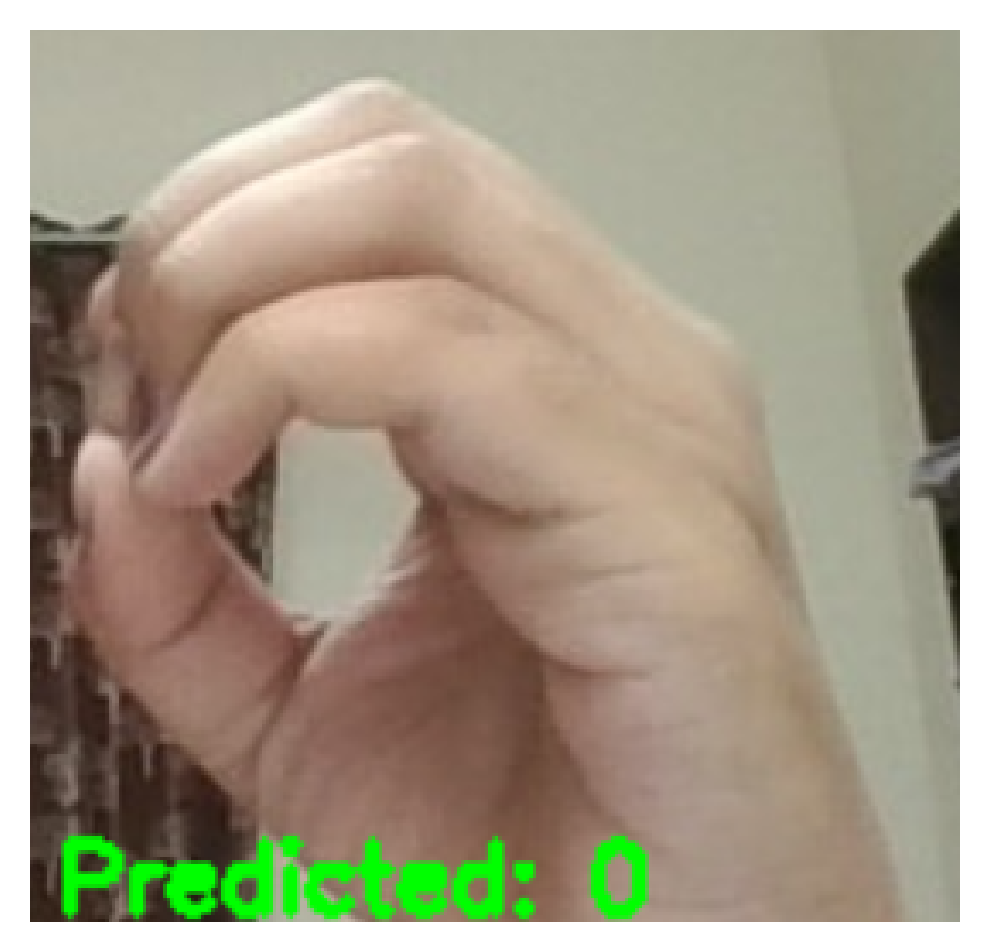

In [85]:
# Real time gesture recognition
# 0
import matplotlib.pyplot as plt
# Load the image
img = plt.imread("C:/Users/91981/OneDrive/Pictures/Screenshots/zero.png")

# Set the figure size to make the image smaller
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


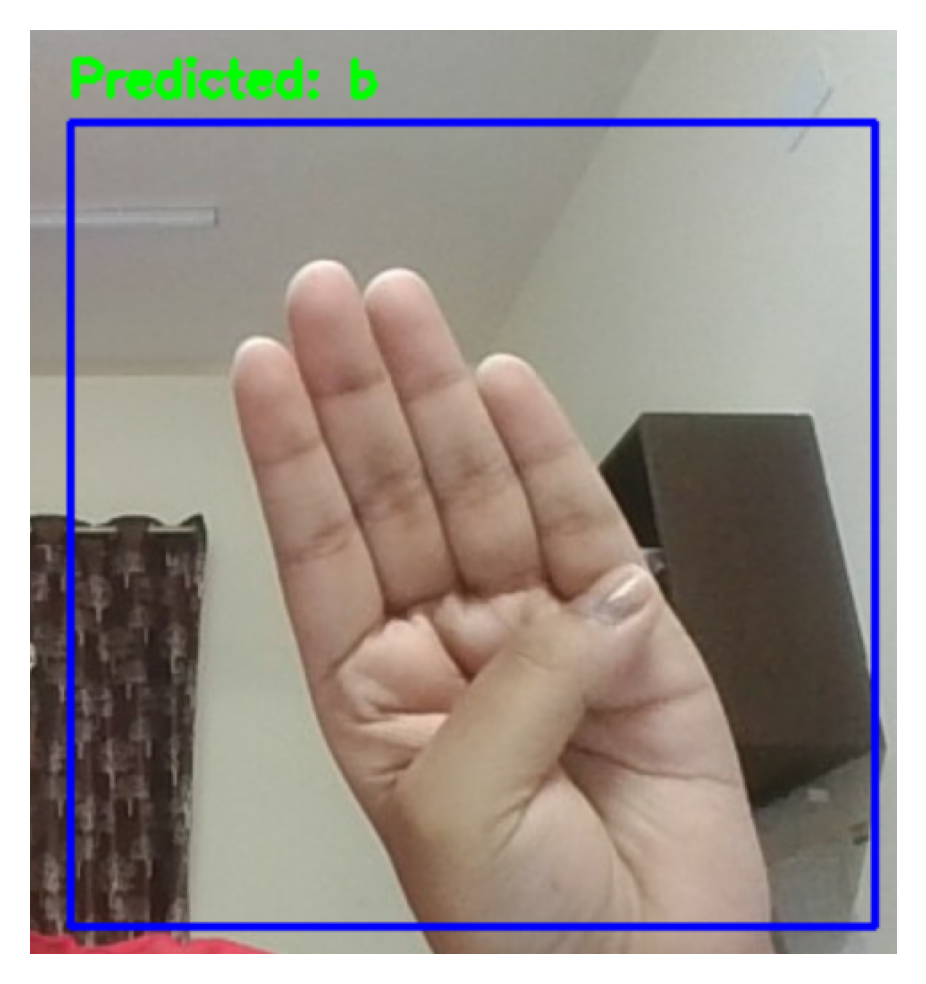

In [86]:
# b
import matplotlib.pyplot as plt
# Load the image
img = plt.imread("C:/Users/91981/OneDrive/Pictures/Screenshots/b.png")

# Set the figure size to make the image smaller
plt.figure(figsize=(4,4)) 
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

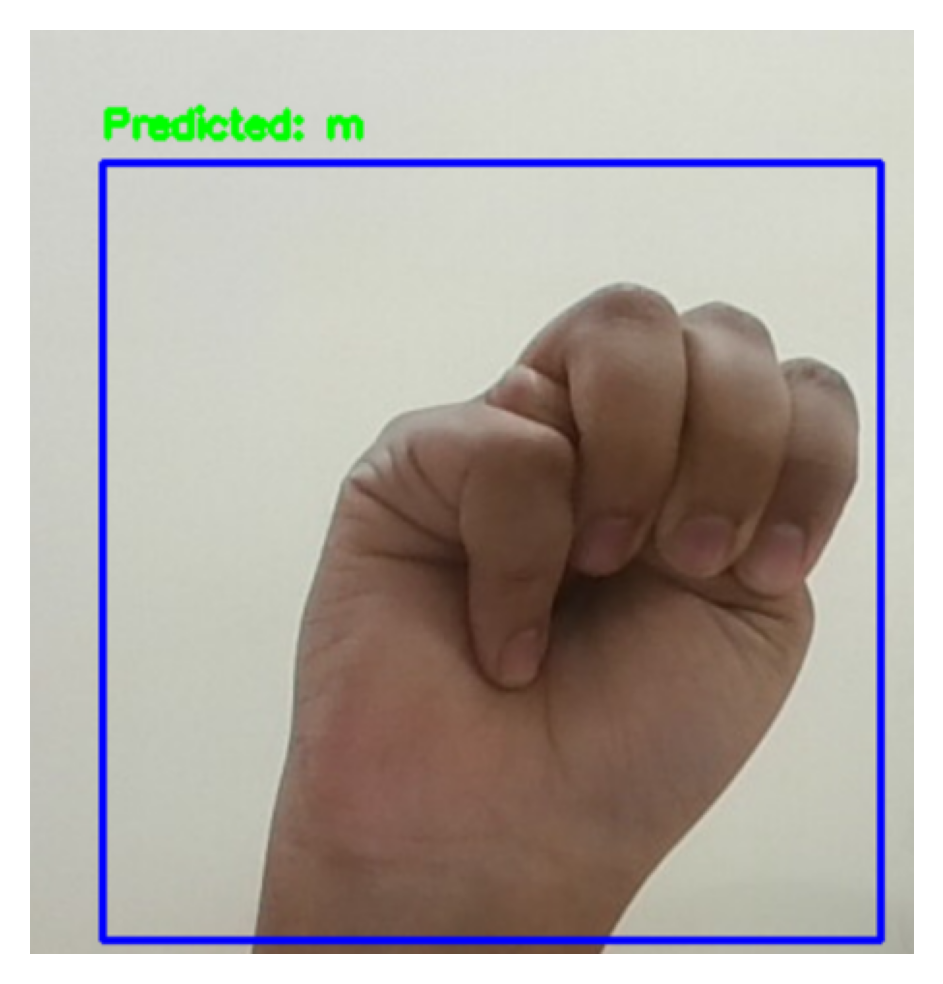

In [87]:
# m
import matplotlib.pyplot as plt
# Load the image
img = plt.imread("C:/Users/91981/OneDrive/Pictures/Screenshots/m.png")

# Set the figure size to make the image smaller
plt.figure(figsize=(4,4)) 
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

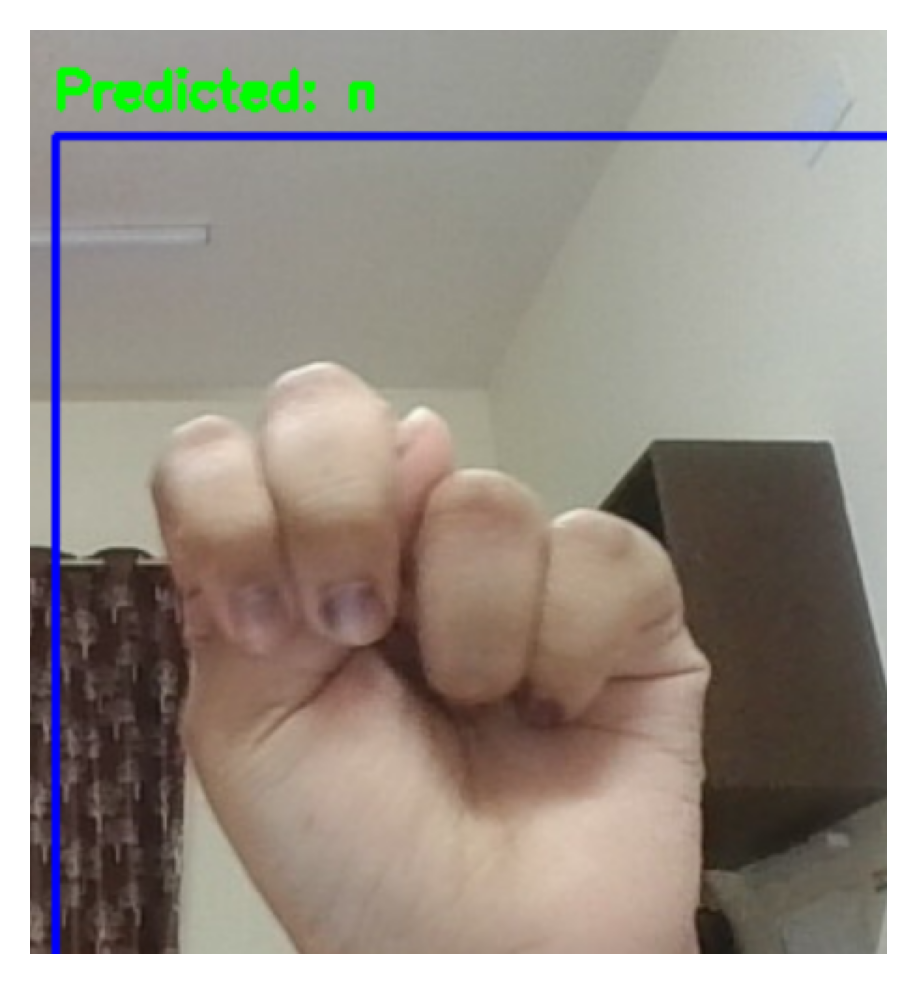

In [88]:
# n
import matplotlib.pyplot as plt
# Load the image
img = plt.imread("C:/Users/91981/OneDrive/Pictures/Screenshots/n.png")

# Set the figure size to make the image smaller
plt.figure(figsize=(4,4)) 
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# REPORT ON HAND GESTURE RECOGNITION USING CNN ON ASL DATASET

# 1) Data Preprocessing
- The dataset has 2515 images with 36 classses (0-9 to a-z) where each class has 70 images except class t having 65 images. The dataset is splitted in 80:20 ratio with 2012 images for training and 503 images for validation after augmentation with a target size of 64 X 64. For testing, all 2515 images were used without augmentation.
- The dataset is loaded from a directory structure containing subfolders for each gesture class.
- Image Augmentation: The model uses ImageDataGenerator for augmenting the training data with techniques like rescaling, random width/height shifts, shear transformations, and zooms. This helps improve generalization.
- The data is split into training (80%) and validation (20%) sets, with separate test data loading without augmentation.

# 2) Exploratory Data Visualization
- The visualization displays 10 images along with their corresponding class labels, which helps ensure the data is loaded correctly.

# 3) Model Architecture: The model is a Sequential CNN with the following architecture:
- Convolutional Layers: 4 convolutional layers (32, 64, 128, and 256 filters) followed by max-pooling.
- Batch Normalization: Applied after the final convolutional layer to help normalize activations.
- Regularization: L2 regularization is applied to the fully connected layer to reduce overfitting.
- Dropout: A dropout layer with a rate of 0.5 is used to further prevent overfitting.
- Dense Layers: Two fully connected layers, the last one being a softmax layer with 36 units (one per class).

# 4) Model Compilation
- The model is compiled using the Adam optimizer with a learning rate of 0.001, and categorical cross-entropy as the loss function. 
- The accuracy metric is also tracked during training.

# 5) Training  and test results
- The model was trained for 25 epochs (out of a possible 50) as early stooping was used to avoid overfitting.
- The final training accuracy reached around 88.07%, with the validation accuracy at 86.88% by Epoch 25.
- The test accuracy was 94.00%, indicating strong generalization to the test data.
- The test loss was 0.5093, which is relatively low, supporting the good test accuracy.

# 6) Observation from training and validation graph
- In accuarcy plot, The model's accuracy improves steadily for both training and validation sets, stabilizing around 80% to 90% by the end.
- In loss plot, both losses decrease sharply in the first few epochs and then flatten out, indicating effective learning. The validation loss follows the same trend as the training loss, but the two lines converge well after epoch 10, indicating that the model generalizes well without severe overfitting.

# 7) Observation from Classification report and Confusion Matrix
- Overall Accuracy: 94% (on the test set with 2,515 samples).
### Class-wise Analysis:
- High Performance:
- Several classes like 3, 7, 8, 9, and others show perfect precision, recall, and F1-scores of 1.00, meaning the model perfectly predicted those classes.
- Classes with near-perfect performance include class f (F1-score of 0.99) and class h (F1-score of 1.00).
### Challenges:
- Class 6 shows some difficulty with lower recall (0.50) and F1-score (0.65), indicating that many instances of class 6 were misclassified.
- Class 1 has a high precision (1.00) but a lower recall (0.66), indicating over-prediction in this class.
- Class v also had challenges, with a lower F1-score of 0.68 and recall of 0.51.
### Confusion matrix analysis:
- Perfect Predictions: Several classes, such as 3, 7, h, x, and others, show no errors, indicating the model predicts them with complete accuracy.
- Misclassifications: Class 6 seems to have some confusion with other classes, as observed from the off-diagonal entries. The model also struggles a bit with classes v and w.

# 8) Predictions from the dataset
- Plotted 10 random images from the test data with 10 actual and predicted labels.
- Accurately predicted 10 random classes for the respective images.

# 8) Real time Gesture Recognition
- Used Web CAM to capture the gesture.
- Imports: cv2 for webcam handling, numpy for numerical processing.
- Class Labels: Defined for digits ('0'-'9') and letters ('a'-'z').
- Webcam Setup: Initializes video capture, retrieves frame dimensions, and defines a 300x300 ROI on the right side of the frame.
- Pre-processing: The pre_process_frame() function resizes the ROI to 64x64 and normalizes pixel values.
- Main Loop: Reads webcam frames, converts them to grayscale, applies Gaussian blur(to reduce noise), and thresholds to detect hand contours.If contours are found, it draws a blue rectangle for the ROI, extracts the ROI, preprocesses it, and prepares it for model prediction.Displays predicted class label on the screen based on the model output.Exit: Stops if 'q' is pressed.

# 9) Challenges Encountered for real time prediction
- When implementing real-time gesture prediction using an American Sign Language (ASL) dataset with a webcam inconsistent lighting significantly affected the quality of the video feed, making it difficult for gesture recognition algorithms to accurately identify some ASL signs.
- The performance of ASL gesture recognition was affected by the computational power of the device running the algorithm.


# 10) Further Recommendation
- Pre trained models can be used instead of training the CNN from scratch, reducing training time and ensuring faster convergence.
- Hyper parameter tuning can be done such as adjusting learning rate, optimiser, adding more dropout layers or increasing no of convolution layers.